In [9]:
from PIL import Image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import cv2
import copy

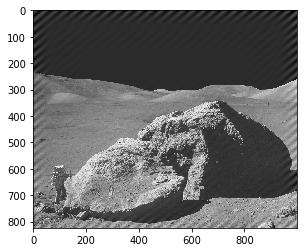

In [44]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
img_as = Image.open('astronaut-interference.tif')
img_as = np.asarray(img_as)
img_as = cv2.copyMakeBorder(img_as,0,img_as.shape[0],0,img_as.shape[1],cv2.BORDER_CONSTANT,value=0)
f = np.fft.fft2(img_as)
fshift_as = np.fft.fftshift(f)
dft_as = np.log(1+np.abs(fshift_as))
points_as = [[774.5,950.5],[874.5,1050.5]]
m = fshift_as.shape[0]
n = fshift_as.shape[1]
for u in range(m):
    for v in range(n):
        for d in range(len(points_as)):
            u0 = points_as[d][0]
            v0 = points_as[d][1]
            d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 0.5)
            d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 0.5)           
            fshift_as[u][v] *= (1.0/(1+pow((9/d1),4)))*(1.0/(1+pow((9/d2),4)))                    
f_ishift_as = np.fft.ifftshift(fshift_as)
img_back_as = np.fft.ifft2(f_ishift_as)
img_back_as = np.abs(img_back_as)
img_recon = img_back_as[:int(img_as.shape[0]/2),:int(img_as.shape[1]/2)]
plt.imshow(img_recon,'gray')
plt.savefig('as_recon.jpg')
plt.show()

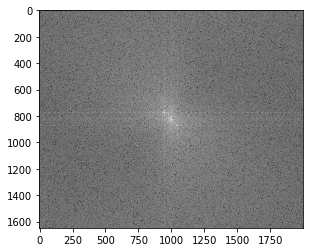

In [42]:
plt.imshow(dft_as,'gray')
plt.savefig('dft_as.jpg')
plt.show()

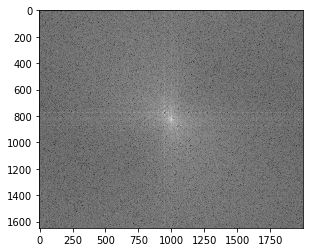

In [52]:
dft_filtered = np.log(1+np.abs(fshift_as))
plt.imshow(dft_filtered,'gray')
plt.savefig('dft_as_recon.jpg')
plt.show()

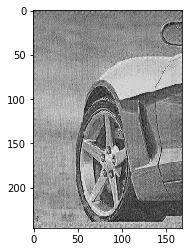

In [49]:
img_car = Image.open('car-moire-pattern.tif')
img_car = np.asarray(img_car)
f_car = np.fft.fft2(img_car)
fshift_car = np.fft.fftshift(f_car)
dft_car = np.log(1+np.abs(fshift_car))
points_car = [[81.5,111.5],[40.5,111.5],[44.5,54.5],[85.5,55.5],[165.5,57.5],[206.5,57.5],[161.5,113.5],[202.5,114.5]]
m = fshift_car.shape[0]
n = fshift_car.shape[1]
for u in range(m):
    for v in range(n):
        for d in range(len(points_car)):
            u0 = points_car[d][0]
            v0 = points_car[d][1]
            d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 0.5)
            d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 0.5)
            fshift_car[u][v] *= (1.0/(1+pow((9/d1),4)))*(1.0/(1+pow((9/d2),4)))                    
f_ishift_car = np.fft.ifftshift(fshift_car)
img_back_car = np.fft.ifft2(f_ishift_car)
img_back_car = np.abs(img_back_car)
plt.imshow(img_back_car,'gray')
plt.savefig('car_recon.jpg')
plt.show()

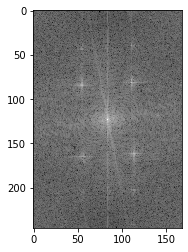

In [50]:
plt.imshow(dft_car,'gray')
plt.savefig('dft_car.jpg')
plt.show()

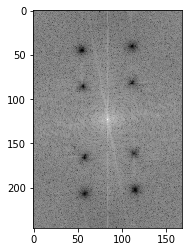

In [51]:
dft_filtered_car = np.log(1+np.abs(fshift_car))
plt.imshow(dft_filtered_car,'gray')
plt.savefig('dft_car_recon.jpg')
plt.show()